# DISEASE PREDICTION

1. Importing necessary libraris

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

2. Reading dataset

In [3]:
df = pd.read_csv("dataset/Training.csv").dropna(axis=1)

In [4]:
df["prognosis"].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [5]:
disease_counts = df["prognosis"].value_counts()

In [7]:
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

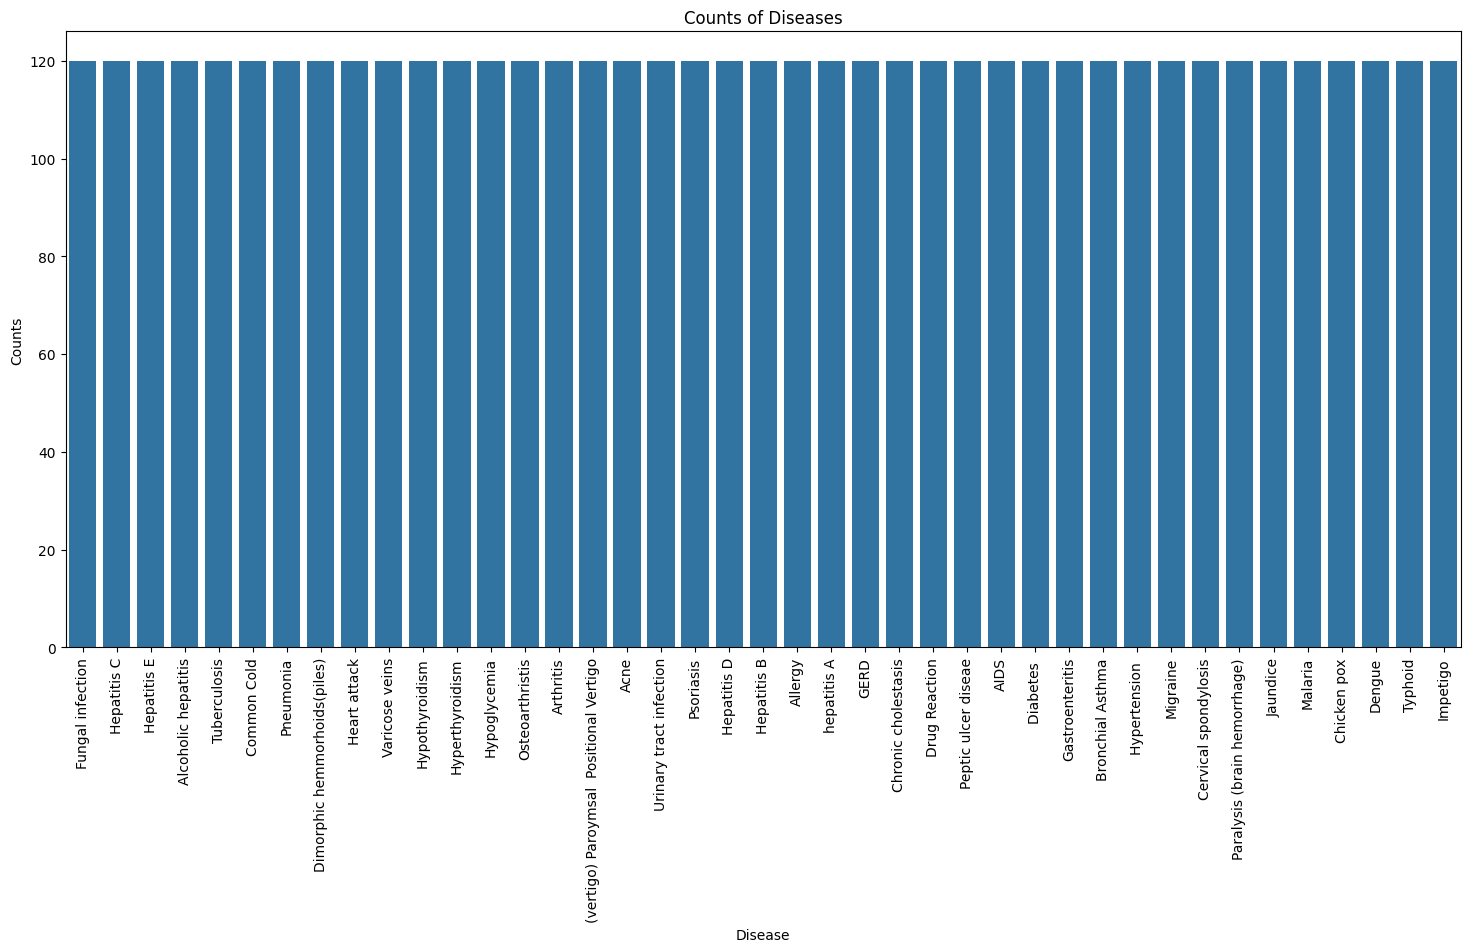

In [8]:
plt.figure(figsize=(18,8))
sns.barplot(x="Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.title('Counts of Diseases')
plt.show()

from the above graph we can notice that dataset is balanced. There is exactly 120 sample for each diseases no further balancing is required

3. Using label encoder encoding target value into numerical

In [9]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

4. Splitting the data into training and testing sets

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=24)

In [11]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


5. Model Selection

In [12]:
def cv_scoring(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))

In [13]:
models={
    "SVC":SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest Classifier":RandomForestClassifier(random_state=18)
}

In [14]:
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv =10, n_jobs=-1,scoring=cv_scoring)
    print("*"*40)
    print("Model: ",model_name)
    print("Scores: ",scores)
    print("Mean Score",np.mean(scores))

****************************************
Model:  SVC
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score 1.0
****************************************
Model:  Gaussian NB
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score 1.0
****************************************
Model:  Random Forest Classifier
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score 1.0


by above we can notice that all machine learining models are performing well now we need to combine all these models

1. SVM classifier

In [15]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [16]:
preds = svm_model.predict(X_test)

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


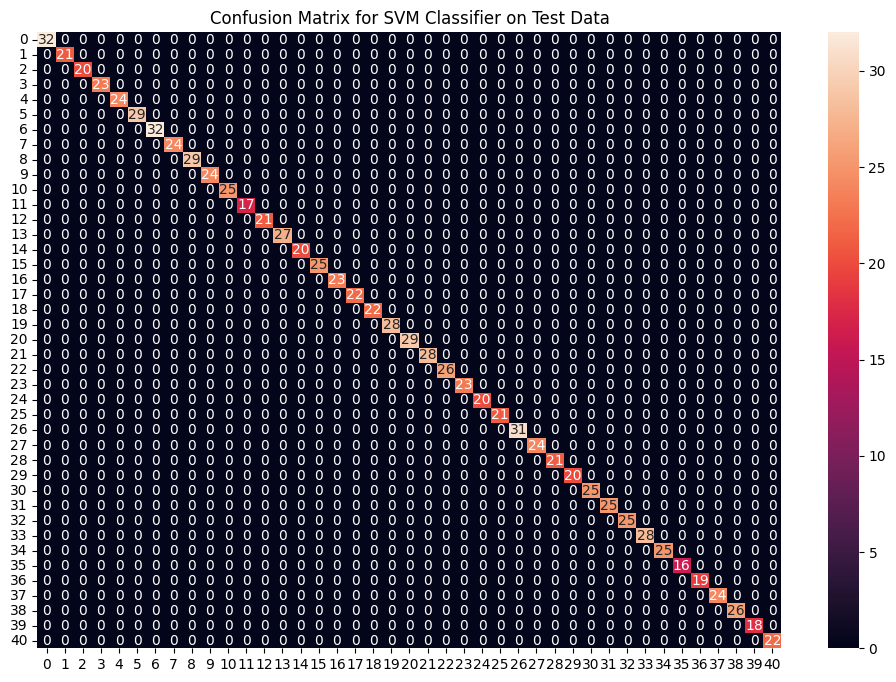

In [18]:
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

2. Naive Baye Classifier

In [19]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [20]:
preds = nb_model.predict(X_test)

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


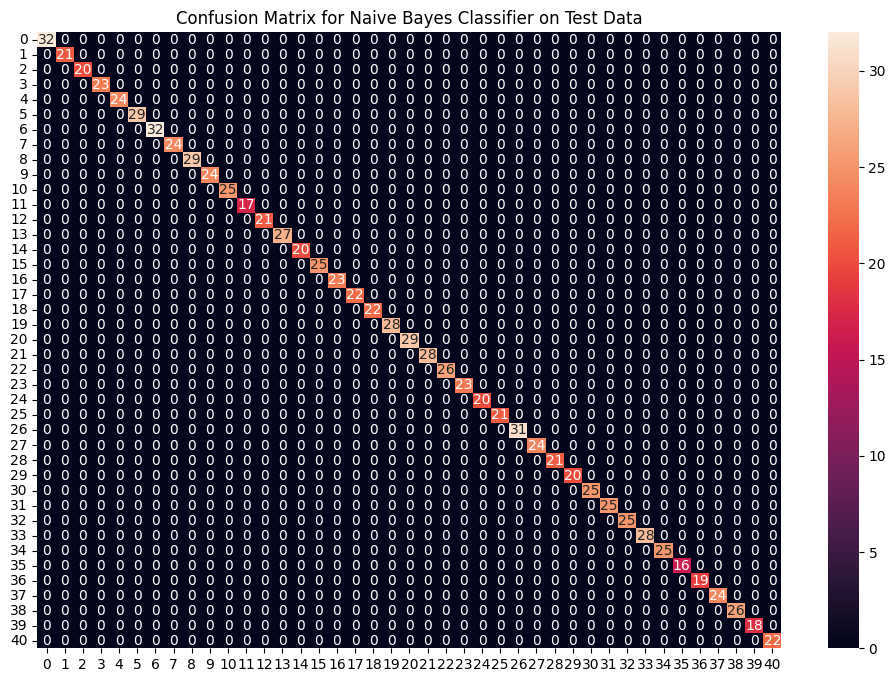

In [21]:
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

3. Random Forest classifier

In [22]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=18)

In [23]:
preds = rf_model.predict(X_test)

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


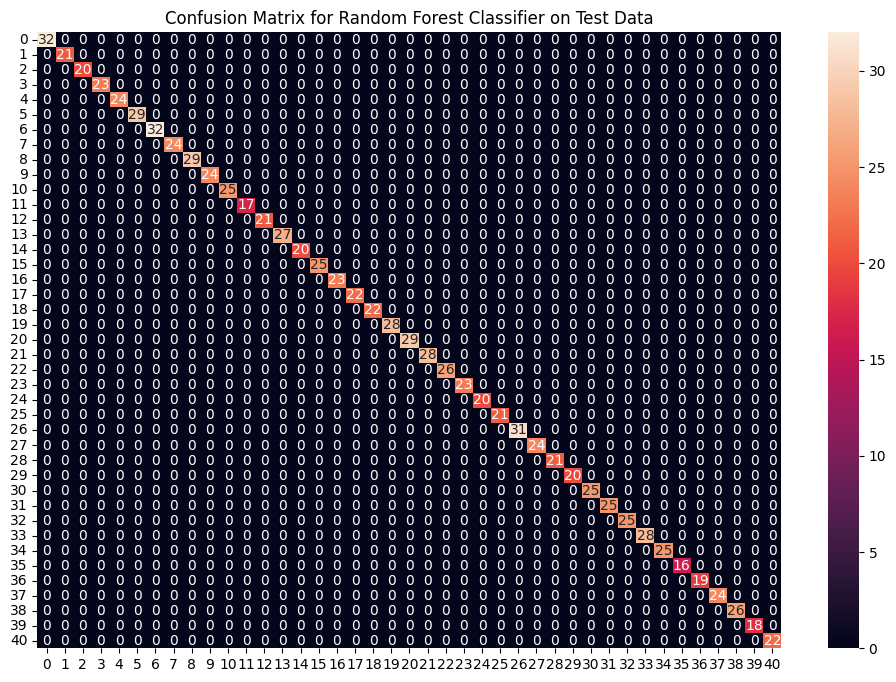

In [24]:
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Now we test this with whole data

In [25]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

In [26]:
final_svm_model.fit(X,y)

SVC()

In [27]:
final_nb_model.fit(X,y)

GaussianNB()

In [28]:
final_rf_model.fit(X,y)

RandomForestClassifier(random_state=18)

In [29]:
test_data = pd.read_csv("./dataset/Testing.csv").dropna(axis=1)

In [30]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [31]:
test_X = test_data.iloc[:,:-1]
test_Y = encoder.transform(test_data.iloc[:,-1])

In [32]:
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

In [33]:
from scipy import stats

In [34]:
final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

In [35]:
print(f"Accuracy on Test Data by commined model: {accuracy_score(test_Y, final_preds)*100}")

Accuracy on Test Data by commined model: 100.0


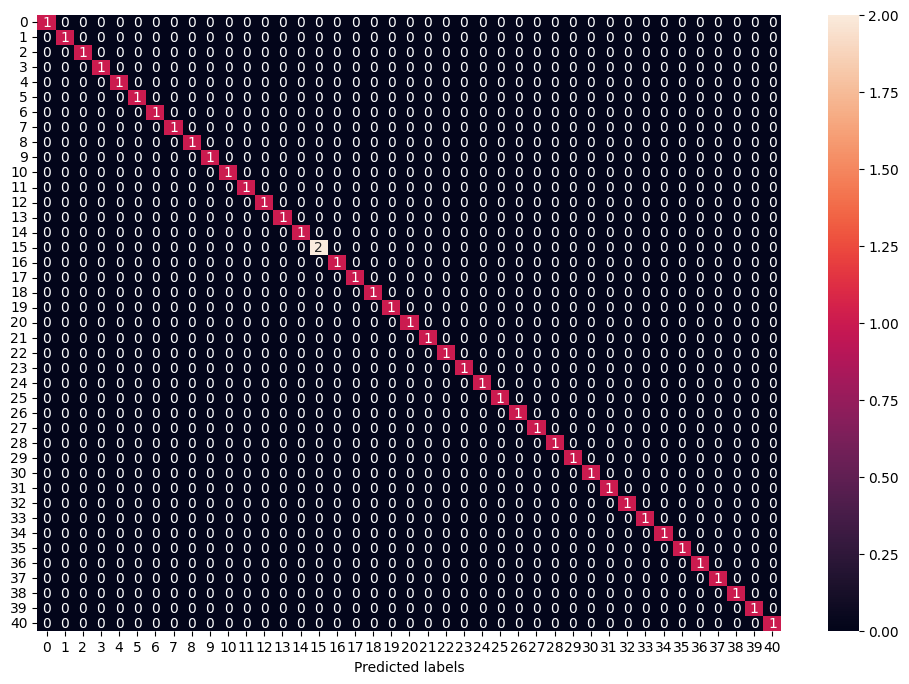

In [36]:
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted labels')
plt.show()

Creating a whole function

In [39]:
import statistics
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        symptom = symptom.strip()  # Remove extra spaces
        index = data_dict["symptom_index"].get(symptom)  # Get index safely
        if index is not None:
            input_data[index] = 1  # Mark symptom as present

    # Convert to DataFrame with proper feature names
    input_data = pd.DataFrame([input_data], columns=X.columns)

    # Generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # Making final prediction by taking mode of all predictions
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])

    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


In [40]:
import pickle

In [41]:
# Save the symptom dictionary
with open("data_dict.pkl", "wb") as file:
    pickle.dump(data_dict, file)

# Save the models
with open("rf_model.pkl", "wb") as file:
    pickle.dump(final_rf_model, file)

with open("nb_model.pkl", "wb") as file:
    pickle.dump(final_nb_model, file)

with open("svm_model.pkl", "wb") as file:
    pickle.dump(final_svm_model, file)

print("✅ Models and data_dict.pkl saved successfully!")


✅ Models and data_dict.pkl saved successfully!
